## INF367A: Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [2]:
train = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv("data/test.csv")
train.info() # we see that we need to change the types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
# converts feature types and ordering columns back

new = train.drop(columns = ['PassengerId']).convert_dtypes()

new['PassengerId'] = train['PassengerId'].copy()

# Creates new feature containing the group number of the passenger  

train[['Group', 'G_Id']] = train['PassengerId'].str.split('_', expand=True).copy()

train.drop(['PassengerId'], axis=1)


train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,G_Id
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,0004,01
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,0005,01
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True,0006,01
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,<NA>,Candra Jacostaffey,True,0006,02
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True,0007,01
9,0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True,0008,01


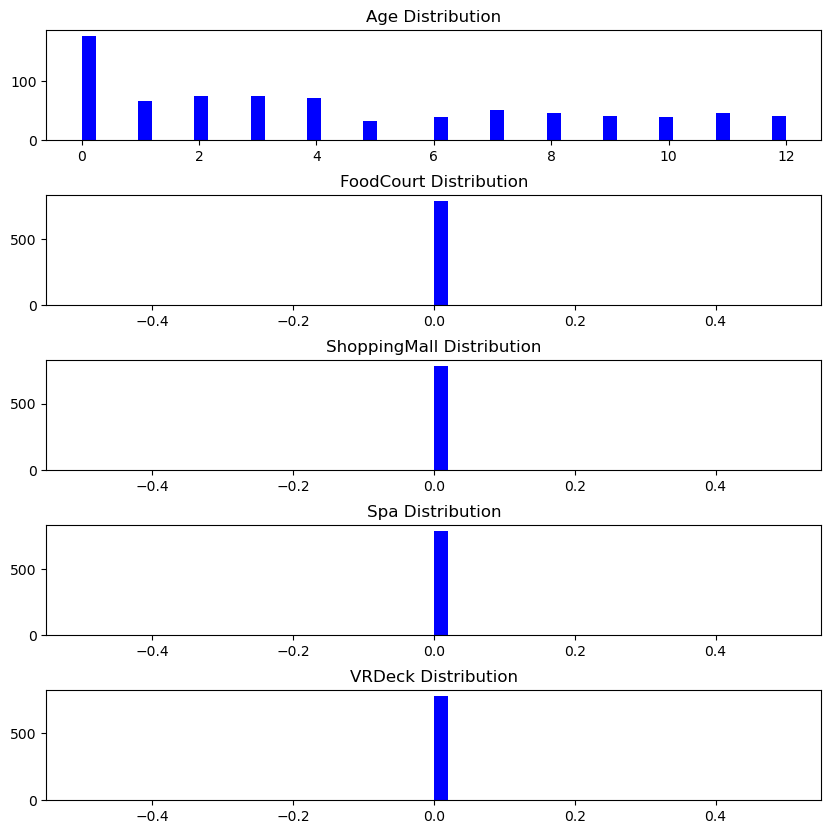

In [4]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed

# Looking at the numerical distribution
ax[0].hist(train['Age'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[0].set_title('Age Distribution')

ax[1].hist(train['FoodCourt'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[1].set_title('FoodCourt Distribution')

ax[2].hist(train['ShoppingMall'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[2].set_title('ShoppingMall Distribution')

ax[3].hist(train['Spa'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[3].set_title('Spa Distribution')

ax[4].hist(train['VRDeck'][train['Age'] < 13].dropna(), bins=50, color='b')
ax[4].set_title('VRDeck Distribution')


plt.show()

In [5]:
train[train['Age'].isna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,0.0,178.0,175.0,175.0,178.0,175.0
mean,<NA>,166.780899,416.651429,101.857143,351.831461,280.737143
std,<NA>,469.211615,1484.930127,325.385478,1341.703898,918.62454
min,<NA>,0.0,0.0,0.0,0.0,0.0
25%,<NA>,0.0,0.0,0.0,0.0,0.0
50%,<NA>,0.0,0.0,0.0,0.0,0.0
75%,<NA>,7.5,25.5,4.0,31.75,14.0
max,<NA>,3478.0,13342.0,2138.0,12062.0,6985.0


In [8]:
def preprocess(df):
    new_df = df.copy() # remove this to make it inplace
    # Split the column and create new columns if it exists
    new_df[['Deck', 'Num', 'Side']] = new_df['Cabin'].str.split('/', expand=True)


    new_df = pd.get_dummies(new_df, columns=['Deck', 'Side', 'HomePlanet', 'Destination'], drop_first=True)

    new_df = new_df.drop(columns=['Cabin', 'PassengerId', 'Name'], errors='ignore') # Drop these columns

    bool_cols = new_df.select_dtypes(include='bool').columns  # Select only boolean columns

    all_int_cols = list(bool_cols) + ['Group', 'G_Id', 'Num']


    new_df[all_int_cols] = new_df[all_int_cols].apply(pd.to_numeric, errors='coerce')

    ## temp imputing solution, ValueError otherwise.
    ##

    imputer  = SimpleImputer(strategy='most_frequent')

    new_df[all_int_cols] = imputer.fit_transform(new_df[all_int_cols])

    # Convert columns back to integers after imputation
    new_df[all_int_cols] = new_df[all_int_cols].astype(int)

    return new_df

In [9]:
df = preprocess(train)

In [ ]:
df.head(10)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39,False,0,0,0,0,0,False,0001,...,False,False,False,False,False,False,True,False,False,True
1,False,24,False,109,9,25,549,44,True,0002,...,False,False,True,False,False,True,False,False,False,True
2,False,58,True,43,3576,0,6715,49,False,0003,...,False,False,False,False,False,True,True,False,False,True
3,False,33,False,0,1283,371,3329,193,False,0003,...,False,False,False,False,False,True,True,False,False,True
4,False,16,False,303,70,151,565,2,True,0004,...,False,False,True,False,False,True,False,False,False,True
5,False,44,False,0,483,0,291,0,True,0005,...,False,False,True,False,False,False,False,False,True,False
6,False,26,False,42,1539,3,0,0,True,0006,...,False,False,True,False,False,True,False,False,False,True
7,True,28,False,0,0,0,0,<NA>,True,0006,...,False,False,False,True,False,True,False,False,False,True
8,False,35,False,0,785,17,216,0,True,0007,...,False,False,True,False,False,True,False,False,False,True
9,True,14,False,0,0,0,0,0,True,0008,...,False,False,False,False,False,False,True,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  8693 non-null   int32
 1   Age                        8514 non-null   Int64
 2   VIP                        8693 non-null   int32
 3   RoomService                8512 non-null   Int64
 4   FoodCourt                  8510 non-null   Int64
 5   ShoppingMall               8485 non-null   Int64
 6   Spa                        8510 non-null   Int64
 7   VRDeck                     8505 non-null   Int64
 8   Transported                8693 non-null   int32
 9   Group                      8693 non-null   int32
 10  G_Id                       8693 non-null   int32
 11  Num                        8693 non-null   int32
 12  Deck_B                     8693 non-null   int32
 13  Deck_C                     8693 non-null   int32
 14  Deck_D                  

In [13]:
# Splitting data

X_train = df.drop(columns=['Transported'])

Y_train = df['Transported']


# Models

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions
#y_pred = model.predict(X_test)

In [10]:
print(train.duplicated().sum()) # no duplicated datapoints
train.describe()

0


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.0,8512.0,8510.0,8485.0,8510.0,8505.0
mean,28.82793,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.48924,604.696458,1136.705535,1145.717189
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,0.0,0.0,0.0,0.0,0.0
50%,27.0,0.0,0.0,0.0,0.0,0.0
75%,38.0,47.0,76.0,27.0,59.0,46.0
max,79.0,14327.0,29813.0,23492.0,22408.0,24133.0


In [11]:
train.dtypes

PassengerId             object
HomePlanet      string[python]
CryoSleep              boolean
Cabin           string[python]
Destination     string[python]
Age                      Int64
VIP                    boolean
RoomService              Int64
FoodCourt                Int64
ShoppingMall             Int64
Spa                      Int64
VRDeck                   Int64
Name            string[python]
Transported            boolean
Group                   object
G_Id                    object
dtype: object

In [12]:
categoric = []
numeric = []

for col in train.columns:
    if train[col].dtype == 'Int64':
        numeric.append(col)
    else:
        categoric.append(col)

In [13]:
#numeric.remove('Transported')

print(numeric)
print(categoric)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported', 'Group', 'G_Id']


<Axes: >

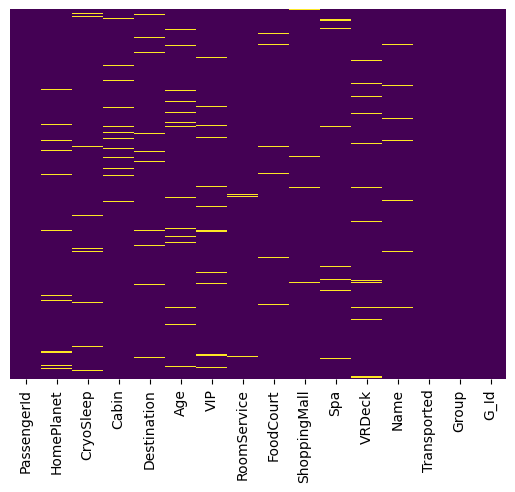

In [14]:
# missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # https://github.com/rrupam/Titanic-with-Pytorch/blob/master/Titanic_from_scratch.ipynb


Text(0.5, 1.0, 'Correlation Matrix')

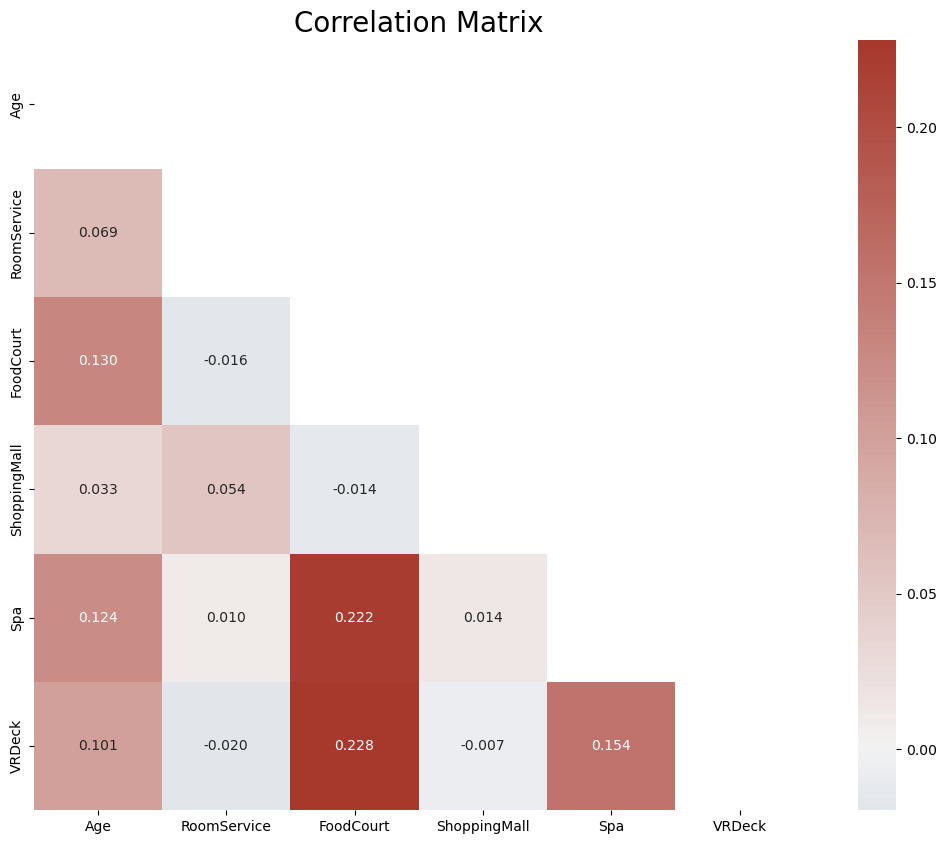

In [ ]:
# corr matrix for the numeric categories # https://maria-aguilera.github.io/projects/spaceship-titanic.html


plt.figure(figsize=(14,10))
matrix = train[numeric].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.3f', square=True, cmap=cmap)

plt.title('Correlation Matrix',fontsize = 20)
#plt.savefig('Correlation Matrix.png')

In [ ]:
# makking a better corr matrix



correlation_matrix = train.corr() # need onehot encoding and preprocessed features first


# Create the correlation heatmap with two decimal places in annotations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Europa'

In [ ]:
from sklearn.linear_model import LogisticRegression


datasets = {
    'Johannes': train,  # joh
    'Elias': train2,  # mitt dataset
}

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=5000, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

n_runs = 10  # how many runs to average over

results = []

for dataset_name, dataset in datasets.items():
    X = dataset.drop(columns=['Transported'])
    y = dataset['Transported']
    
    for model_name, model in models.items():
        scores = []
        
        for run in range(n_runs):
            X_train, X_val, y_train, y_val = train_test_split(
                X, y, test_size=0.2, stratify=y, random_state=run  # different random_state each time
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            acc = accuracy_score(y_val, y_pred)
            scores.append(acc)
        
        mean_acc = np.mean(scores)
        std_acc = np.std(scores)
        
        results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Mean Accuracy': mean_acc,
            'Std Deviation': std_acc
        })

# Collect results into a nice table
results_df = pd.DataFrame(results)

# Show results
print(results_df)